<a href="https://colab.research.google.com/github/Nataliya2401/DS_11/blob/main/hw_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Створення нейронної мережі

У цьому завданні ми створимо повнозв'язну нейронну мережу, використовуючи при цьому низькорівневі механізми tensorflow.

Архітектура нейромережі представлена на наступному малюнку. Як бачиш, у ній є один вхідний шар, два приховані, а також вихідний шар. В якості активаційної функції у прихованих шарах буде використовуватись сигмоїда. На вихідному шарі ми використовуємо softmax.

Частина коду зі створення мережі вже написана, тобі потрібно заповнити пропуски у вказаних місцях.

## Архітектура нейронної мережі

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" alt="nn" style="width: 400px;"/>


## Про датасет MNIST

Дану нейромережу ми будемо вивчати на датасеті MNIST. Цей датасет являє собою велику кількість зображень рукописних цифр розміром $28 \times 28$ пікселів. Кожен піксель приймає значення від 0 до 255.

Як і раніше, датасет буде розділений на навчальну та тестову вибірки. При цьому ми виконаємо нормалізацію всіх зображень, щоб значення пікселів знаходилось у проміжку від 0 до 1, розділивши яскравість кожного пікселя на 255.

Окрім того, архітектура нейронної мережі очікує на вхід вектор. У нашому ж випадку кожен об'єкт вибірки являє собою матрицю. Що ж робити? У цьому завданні ми "розтягнемо" матрицю $28 \times 28$, отримавши при цьому вектор, що складається з 784 елементів.

![MNIST Dataset](https://www.researchgate.net/profile/Steven-Young-5/publication/306056875/figure/fig1/AS:393921575309346@1470929630835/Example-images-from-the-MNIST-dataset.png)

Більше інформації про датасет можна знайти [тут](http://yann.lecun.com/exdb/mnist/).

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import keras as K
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
num_classes = 10 # загальна кількість класів, у нашому випадку це цифри від 0 до 9
num_features = 784 # кількість атрибутів вхідного вектора 28 * 28 = 784

learning_rate = 0.001 # швидкість навчання нейронної мережі
training_steps = 3000 # максимальне число епох
batch_size = 256 # перераховувати ваги мережі ми будемо не на всій вибірці, а на її випадковій підмножині з batch_size елементів
display_step = 100 # кожні 100 ітерацій ми будемо показувати поточне значення функції втрат і точності

n_hidden_1 = 128 # кількість нейронів 1-го шару
n_hidden_2 = 256 # кількість нейронів 2-го шару

In [3]:
# from tensorflow.keras.datasets import mnist
from keras.datasets import mnist

# Завантажуємо датасет
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Перетворюємо цілочисельні пікселі на тип float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Перетворюємо матриці розміром 28x28 пікселів у вектор з 784 елементів
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Нормалізуємо значення пікселів
x_train, x_test = x_train / 255., x_test / 255.

# Перемішаємо тренувальні дані
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
for idx, elem in enumerate(train_data):
  print(f'step #{idx}: {elem[0].numpy(), elem[1].numpy()}')
  print (len((list(elem[0].numpy())[0])))
  # dataset will be genearted indefinetly,
  # so we'll limit the first 10 elements only
  if idx >= 1:
    break

step #0: (array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([5, 2, 0, 8, 7, 6, 1, 9, 4, 9, 5, 0, 4, 5, 4, 0, 2, 3, 2, 7, 1, 8,
       0, 9, 0, 2, 1, 5, 6, 8, 5, 9, 7, 4, 1, 4, 7, 9, 3, 7, 7, 3, 6, 9,
       8, 2, 3, 1, 6, 4, 7, 5, 9, 8, 2, 7, 7, 3, 3, 4, 4, 7, 6, 4, 2, 3,
       8, 9, 1, 3, 2, 2, 5, 5, 7, 3, 9, 7, 7, 0, 4, 9, 6, 1, 1, 9, 9, 3,
       6, 9, 2, 1, 9, 7, 0, 2, 3, 3, 1, 5, 4, 3, 1, 9, 1, 7, 5, 0, 0, 1,
       6, 5, 5, 2, 8, 8, 5, 2, 6, 6, 1, 0, 6, 6, 7, 1, 7, 5, 8, 3, 0, 1,
       0, 0, 5, 5, 4, 4, 0, 8, 1, 1, 7, 8, 2, 9, 2, 3, 7, 9, 9, 3, 7, 1,
       6, 7, 1, 4, 0, 7, 2, 7, 3, 0, 7, 3, 6, 0, 0, 7, 1, 8, 7, 4, 4, 5,
       9, 2, 4, 0, 7, 2, 2, 9, 4, 7, 8, 5, 7, 6, 0, 7, 7, 8, 5, 9, 6, 4,
       6, 9, 4, 3, 0, 6, 4, 6, 9, 8, 6, 9, 2, 8, 4, 7, 4, 8, 4, 1, 7, 6,
   

In [5]:
len(list(y_train))

60000

In [6]:
# Створимо нейронну мережу

class DenseLayer(tf.Module):
    def __init__(self, in_features, out_features, name=None):
        super().__init__(name=name)
        self.w = tf.Variable(
            tf.random.normal([in_features, out_features]), name="w"
        )
        self.b = tf.Variable(tf.zeros([out_features]), name="b")

    def __call__(self, x, activation=0):
        y = tf.matmul(x, self.w) + self.b
        if activation != 0:
            return tf.nn.softmax(y)
        else:
            return tf.nn.sigmoid(y)

class NN(tf.Module):
  def __init__(self, name=None):
    super().__init__(name=name)
    # Перший шар, який складається з 128 нейронів
    self.layer_1 = DenseLayer(in_features=num_features, out_features=n_hidden_1, name='hidden_layer1')
    # Другий шар, який складається з 256 нейронів
    self.layer_2 = DenseLayer(in_features=n_hidden_1, out_features=n_hidden_2, name='hidden_layer2')
    # Вихідний шар
    self.output_layer = DenseLayer(in_features=n_hidden_2, out_features=num_classes, name='output_layer')

  def __call__(self, x):
    # Передача даних через перші два шари та вихідний шар з функцією активації softmax
    x = self.layer_1(x)
    x = self.layer_2(x)

    return self.output_layer(x, activation=1)

In [7]:
# В якості функції помилки в даному випадку зручно взяти крос-ентропію
def cross_entropy(y_pred, y_true):
    # Закодувати label в one hot vector
    y_true = tf.one_hot(y_true, depth=num_classes)

    # "Обрізаємо" передбачення знизу, щоб уникнути помилки log(0).
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)

    # Обчислення крос-ентропії
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

# Як метрику якості використовуємо точність
def accuracy(y_pred, y_true):
  y_number = tf.argmax(y_pred, axis=1)
  # acc = len(y_true[y_true == y_number]) / y_true.shape[0] * 100
  acc = tf.metrics.Accuracy()
  acc.update_state(y_true, y_number)

  return acc.result()

In [8]:
# Створимо екземпляр нейронної мережі
neural_net = NN(name="mnist")

# Функція навчання нейромережі
def train(neural_net, input_x, output_y):
  # Для налаштування вагів мережі будемо використовувати стохастичний градієнтний спуск
  optimizer = tf.optimizers.SGD(learning_rate)

  # Активація автоматичного диференціювання
  with tf.GradientTape() as g:
    pred = neural_net(input_x)
    loss = cross_entropy(pred, output_y)

    # Отримаємо список оптимізованих параметрів
  train_var = neural_net.trainable_variables
    # Обчислимо за ними значення градієнта
  grads = g.gradient(loss, train_var)

    # Модифікуємо параметри
  optimizer.apply_gradients(zip(grads, train_var))


In [9]:
# Тренування мережі

loss_history = []  # кожні display_step кроків зберігай в цьому списку поточну помилку нейромережі
accuracy_history = [] # кожні display_step кроків зберігай в цьому списку поточну точність нейромережі

# У цьому циклі ми будемо проводити навчання нейронної мережі
# із тренувального датасета train_data вилучи випадкову підмножину, на якій
# відбудеться тренування. Використовуй метод take, доступний для тренувального датасета.
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    # Оновлюємо ваги нейронної мережі
    train(neural_net, batch_x, batch_y)

    if step % display_step == 0:
        pred = neural_net(batch_x)
        loss = cross_entropy(pred, batch_y)
        loss_history.append(loss)

        acc = accuracy(pred, batch_y)
        accuracy_history.append(acc)

        print(f'For Epoch # {step}: Loss: {loss}; Accuracy:  {acc}')


For Epoch # 100: Loss: 350.8462219238281; Accuracy:  0.65234375
For Epoch # 200: Loss: 177.09327697753906; Accuracy:  0.77734375
For Epoch # 300: Loss: 166.44125366210938; Accuracy:  0.8125
For Epoch # 400: Loss: 170.0462646484375; Accuracy:  0.8125
For Epoch # 500: Loss: 126.77877044677734; Accuracy:  0.83984375
For Epoch # 600: Loss: 182.3865966796875; Accuracy:  0.8125
For Epoch # 700: Loss: 73.618408203125; Accuracy:  0.91015625
For Epoch # 800: Loss: 112.79759216308594; Accuracy:  0.84765625
For Epoch # 900: Loss: 99.75343322753906; Accuracy:  0.8828125
For Epoch # 1000: Loss: 80.73095703125; Accuracy:  0.890625
For Epoch # 1100: Loss: 100.97532653808594; Accuracy:  0.875
For Epoch # 1200: Loss: 96.1073989868164; Accuracy:  0.8828125
For Epoch # 1300: Loss: 87.22622680664062; Accuracy:  0.875
For Epoch # 1400: Loss: 75.88720703125; Accuracy:  0.9140625
For Epoch # 1500: Loss: 69.77886962890625; Accuracy:  0.9296875
For Epoch # 1600: Loss: 102.74674987792969; Accuracy:  0.89453125


Text(0, 0.5, 'accuracy')

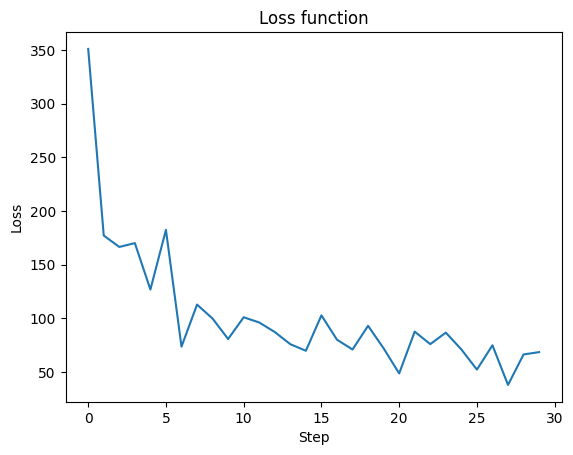

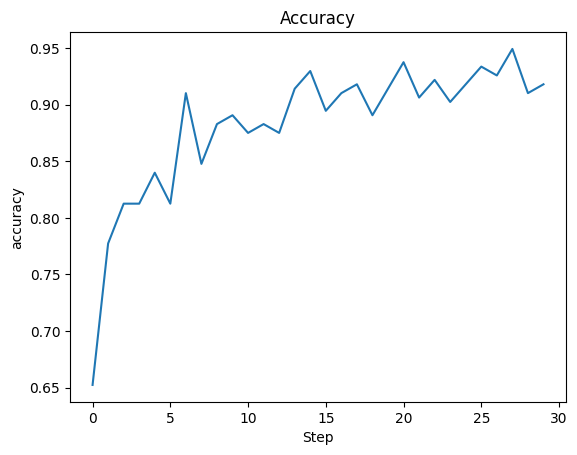

In [10]:
# Виведіть графіки залежності зміни точності і втрат від кроку
# Виведіть графік функції втрат

plt.figure()
plt.plot(loss_history)
plt.title('Loss function')
plt.xlabel('Step')
plt.ylabel('Loss')

# Виведіть графік точності
plt.figure()
plt.plot(accuracy_history)
plt.title('Accuracy')
plt.xlabel('Step')
plt.ylabel('accuracy')


In [14]:
# Обчисліть точність навченої нейромережі

# Тестування моделі на тестових даних
pred = neural_net(x_test)
acc_test = accuracy(pred, y_test)
print(f'Accuracy for test data: {acc_test}')

Accuracy for test data: 0.9032999873161316


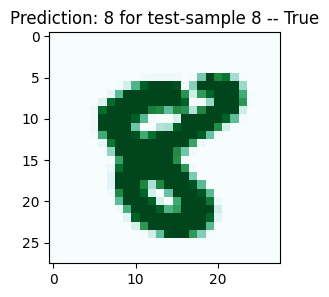

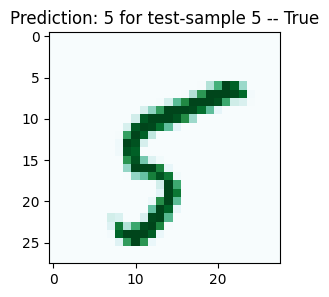

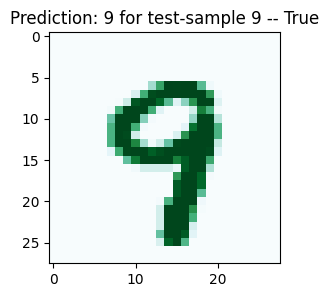

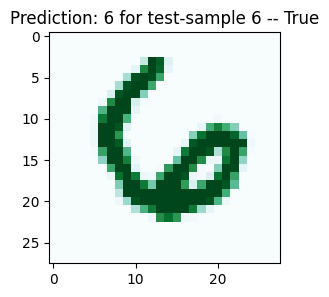

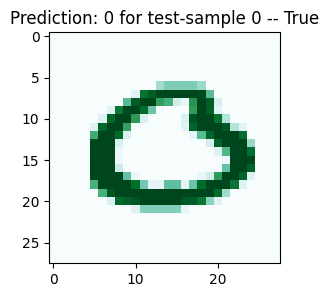

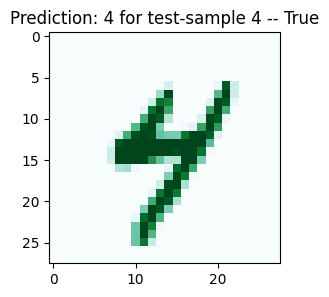

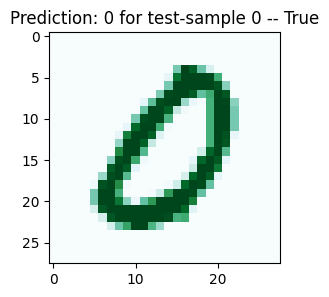

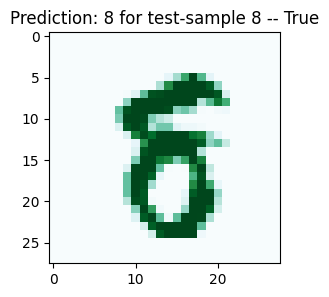

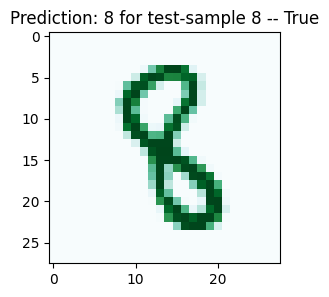

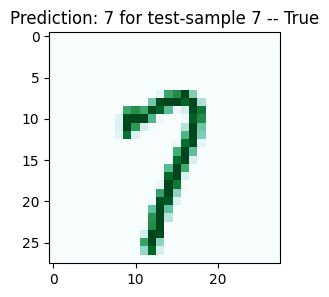

Accuracy for samples: 100.0%


In [55]:
# Протестуйте навчену нейромережу на 10 зображеннях. З тестової вибірки візьміть 5
# випадкових зображень і передайте їх у нейронну мережу.
# Виведіть зображення та випишіть  поруч відповідь нейромережі.
# Зробіть висновок про те, чи помиляється твоя нейронна мережа, і якщо так, то як часто?

# Місце для вашого коду
n_sample = 10
sample_test_x, sample_test_y = list(zip(*[(x_test[i], y_test[i])  for i in random.sample(range(len(x_test)), n_sample)]))
sample_pred = neural_net(sample_test_x)

for i in range(n_sample):
  plt.figure(figsize=(3,3))

  plt.imshow(np.reshape(sample_test_x[i], [28, 28]), cmap='BuGn')
  plt.title(f"Prediction: {tf.argmax(sample_pred.numpy()[i])} for test-sample {sample_test_y[i]} -- {tf.argmax(sample_pred.numpy()[i])==sample_test_y[i]}")
  plt.show()
print(f'Accuracy for samples: {accuracy(sample_pred, sample_test_y) * 100}%')

Висновок: для конкретно цього запуску тестової виборки з 10 випадкових картинок - модель справилась зі 100% точністю. Але ряд попередніх тестів давав меншу точність. Для збільшення Accuracy, на мою думку, треба експерементувати з підбором гіперпараметрів (learning rate, batch size, number_epoch) і тестити інші оптимізатори